<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/AI&ML/Unsupervised Learning"



'Project- Unsupervised Learning - Problem Statement (1)-2.pdf'	 vehicle.csv
'Unsupervised learning_assignment.ipynb'			 vehicle.gsheet


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns

from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore


df=pd.read_csv("/content/drive/My Drive/AI&ML/Unsupervised Learning/vehicle.csv")
df.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [ ]:
df.shape

(846, 19)

In [ ]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

## Class of Vehicle is currently a catagorical variable hence it needs to be converted to numerical type 

In [ ]:
df['class'] = pd.Categorical(df['class']).codes # Replace strings with an integer
df.dtypes


compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                             int8
dtype: object

**Dealing with Missing Values**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

**There are missing values as seen from the info shown above , there should be 846 entries in all fields,but some fields have < 846**

**This needs to be addressed before moving forward**

In [ ]:
medianfilter =lambda x:x.fillna(x.median())
df_copy=df.apply(medianfilter,axis=0)

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

The missing Values have been replaced with the median values using the median filter function

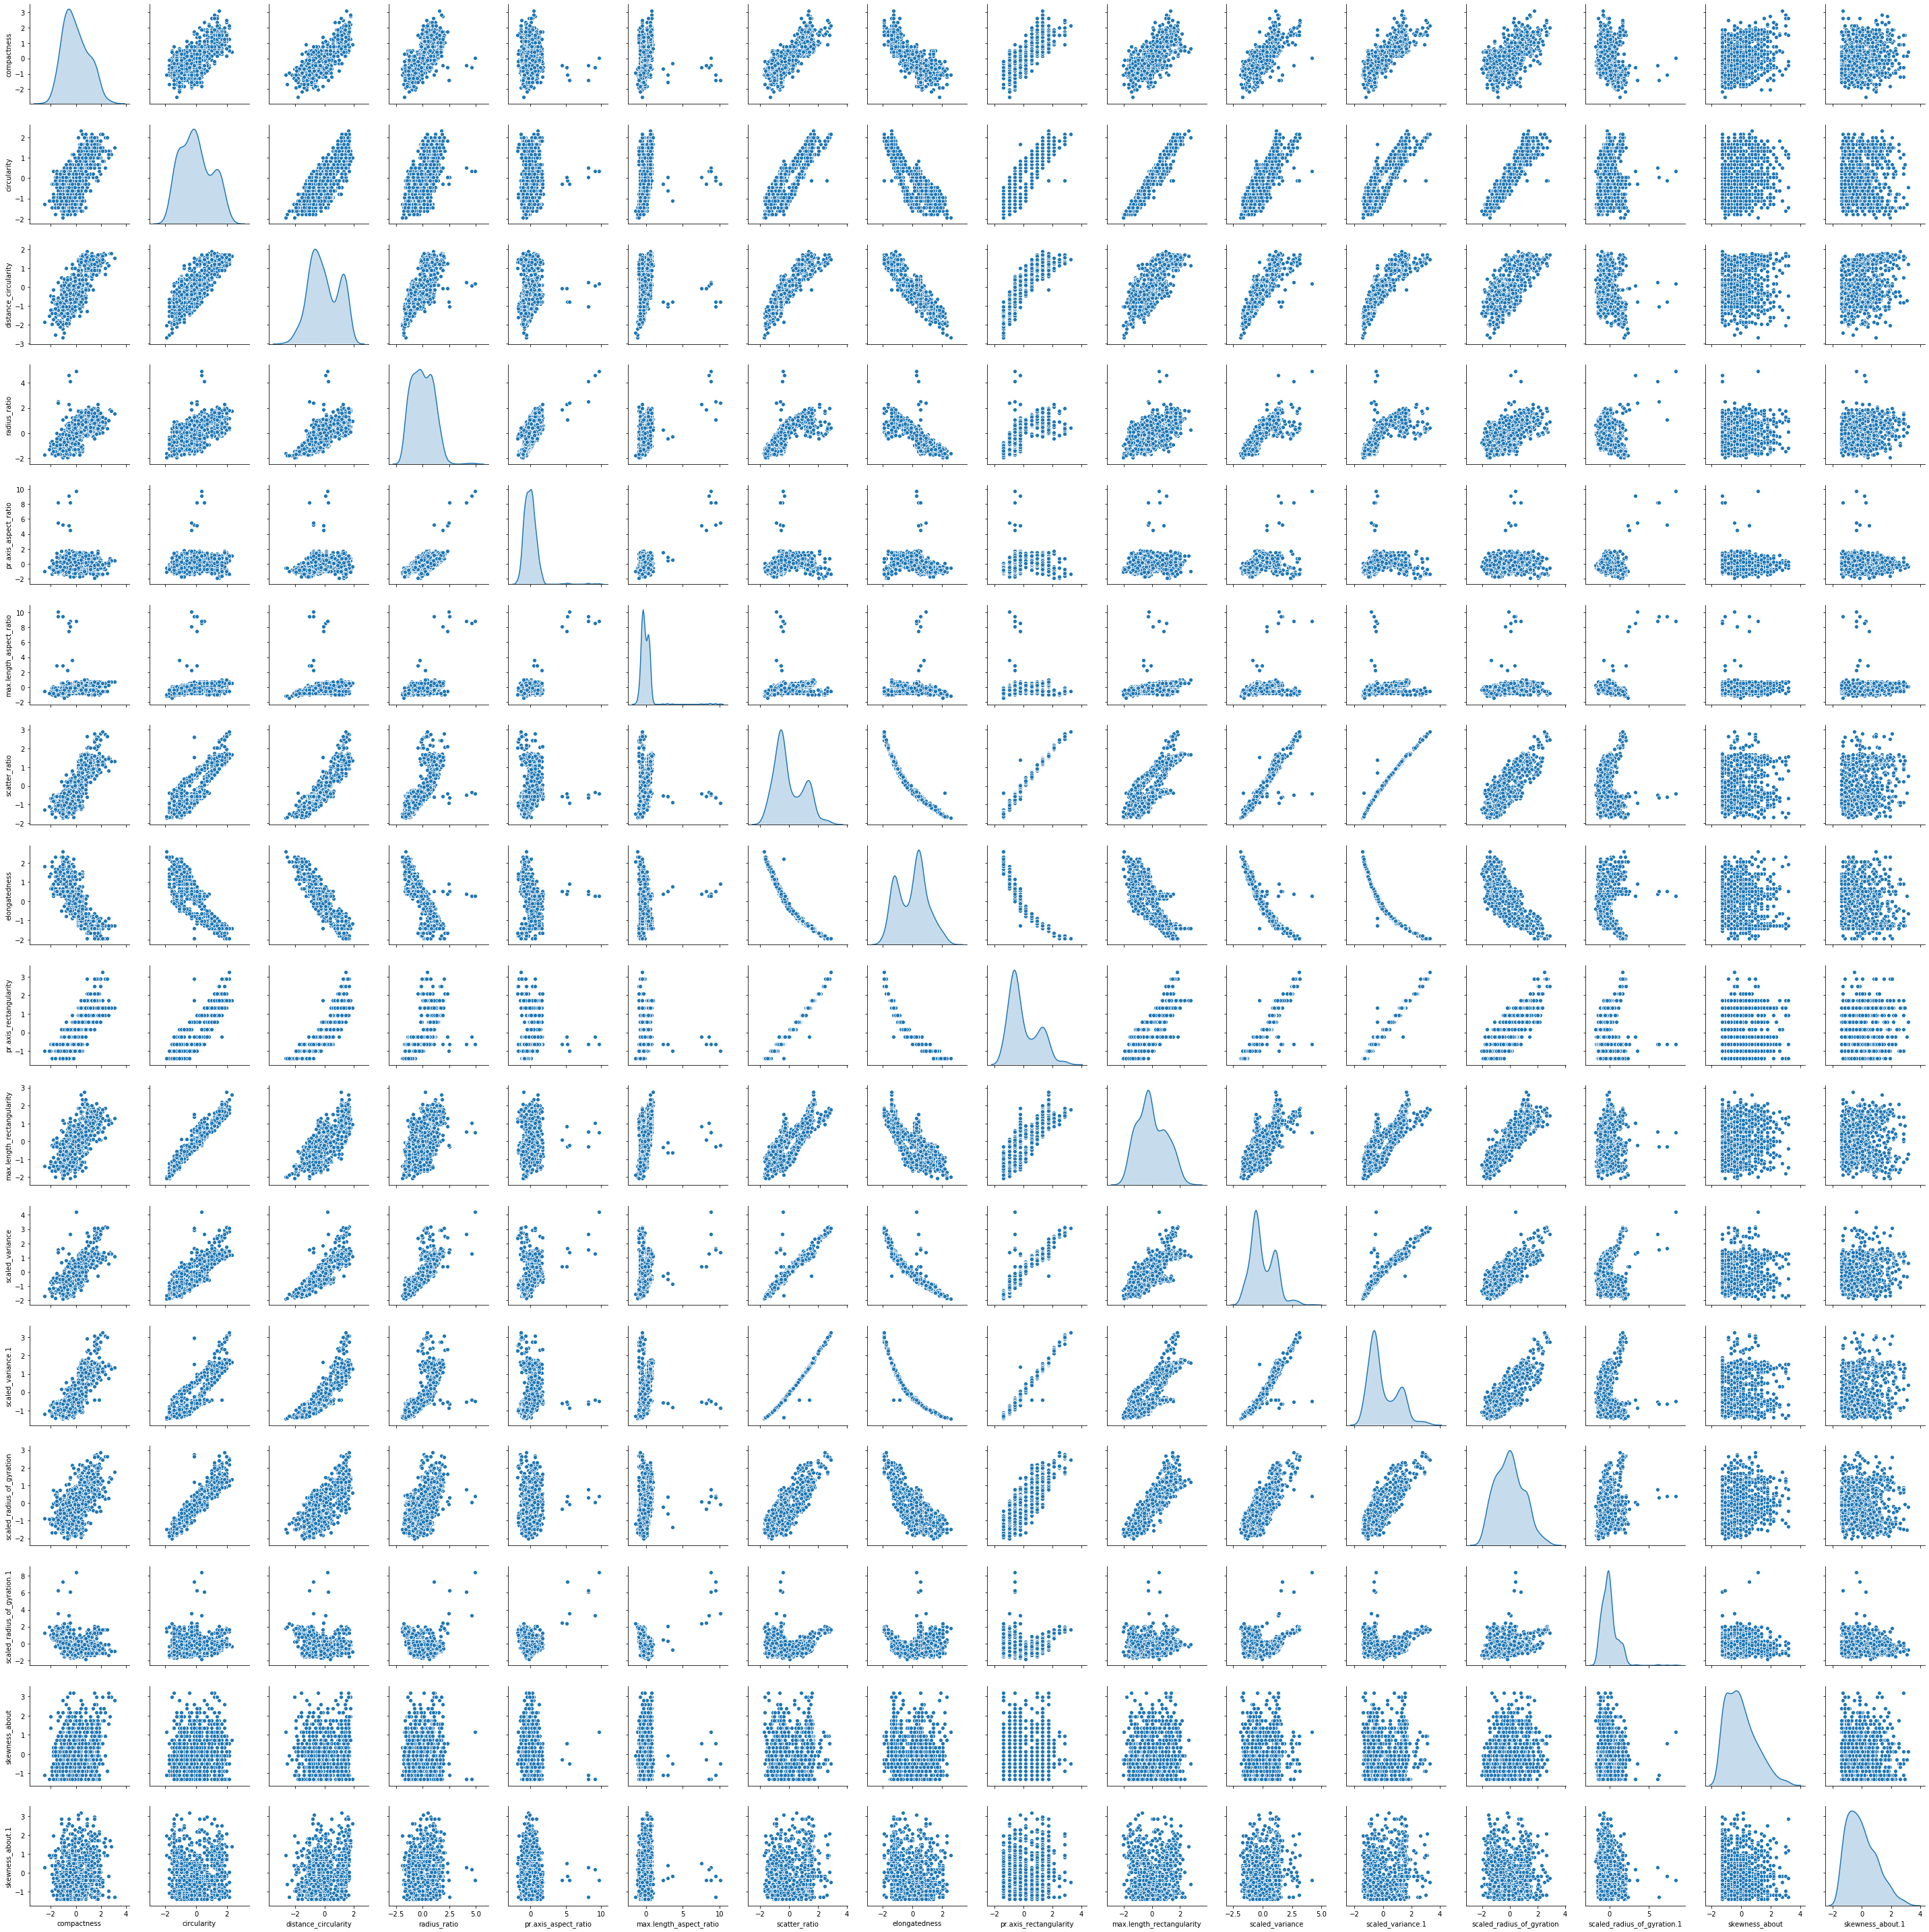

In [ ]:
attributes=df_copy.iloc[:,0:16]
attr_scaled=attributes.apply(zscore)
sns.pairplot(attr_scaled,diag_kind='kde')

**From the above pair plot it seems like, we will need atleast 2 clusters for proper classification, to further confirm we will have to perform an elbow test** 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

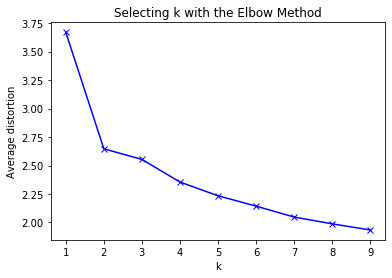

In [ ]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(attr_scaled)
    prediction=model.predict(attr_scaled)
    meanDistortions.append(sum(np.min(cdist(attr_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / attr_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

**From the above we can clearly see an elbow at k=2, will go further with K=2 and K =3**

In [ ]:
# Let us first start with K = 3
model=KMeans(2)
model.fit(attr_scaled)
prediction=model.predict(attr_scaled)

#Append the prediction 
attributes["GROUP"] = prediction
attr_scaled["GROUP"] = prediction
print("Groups Assigned : \n")


Clusters = attributes.groupby(['GROUP'])
Clusters.mean()

Groups Assigned : 



,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1
GROUP,,,,,,,,,,,,,,,,
0,102.434932,51.534247,99.996575,202.229452,63.414384,9.969178,208.880137,31.965753,23.698630,162.832192,224.825342,651.777397,207.667808,72.017123,7.089041,14.712329
1,89.063177,41.287004,72.667870,151.294224,60.761733,7.828520,147.808664,45.664260,18.936823,140.180505,169.501805,327.330325,157.333935,72.667870,5.978339,11.487365


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77b2206be0>,
      dtype=object)

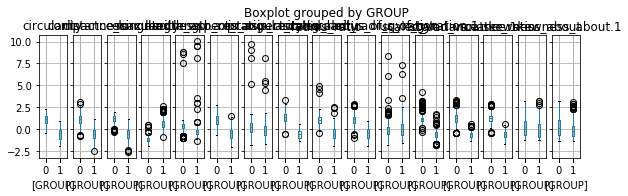

In [ ]:
attr_scaled.boxplot(by='GROUP',layout =(2,17),figsize=(10,5))

In [ ]:
covMatrix =np.cov(attr_scaled,rowvar =False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044 -0.36768414]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.37823903]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088 -0.39309128]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649 -0.34528406]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969786  0.1270594   0.27323306  0.08929427
   0.122

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=17)
pca.fit(attr_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**The Eigen values are as shown below**

In [ ]:
print(pca.explained_variance_)

[9.53425284e+00 1.90745388e+00 1.42179967e+00 1.10092124e+00
 8.77102125e-01 4.94909240e-01 3.58782873e-01 2.08863749e-01
 9.29366453e-02 7.32772376e-02 5.82963128e-02 3.77483369e-02
 2.92858961e-02 2.00518669e-02 1.63120205e-02 1.00135870e-02
 3.21748205e-03]


[5.86895709e-01 1.17416279e-01 8.75210822e-02 6.77689130e-02
 5.39913805e-02 3.04649052e-02 2.20854357e-02 1.28569317e-02
 5.72085922e-03 4.51069392e-03 3.58851987e-03 2.32365738e-03
 1.80273872e-03 1.23432374e-03 1.00411170e-03 6.16401864e-04
 1.98057094e-04]


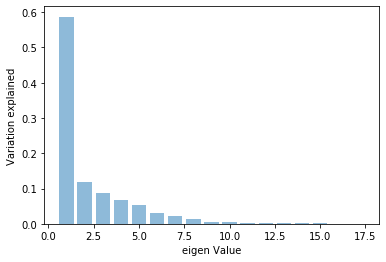

In [ ]:
print(pca.explained_variance_ratio_)
plt.bar(list(range(1,18)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

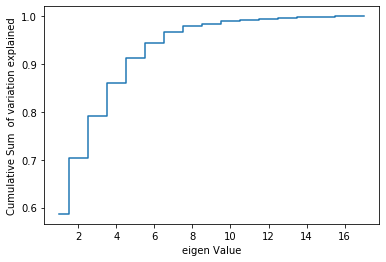

In [ ]:
plt.step(list(range(1,18)),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cumulative Sum  of variation explained')
plt.xlabel('eigen Value')
plt.show()

Dimentionality reduction :

**8 variables can explain > 95% of the variation in the original data**

In [ ]:
pca8=PCA(n_components=8)
pca8.fit(attr_scaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
Xpca8=pca8.transform(attr_scaled)

[[ 2.71023466e-01  2.93211529e-01  3.00944861e-01  2.61840264e-01
   7.67464331e-02  9.57674749e-02  3.15979472e-01 -3.11538520e-01
   3.13166077e-01  2.82376056e-01  3.08346399e-01  3.12883534e-01
   2.73900742e-01 -1.08400746e-02  4.01068911e-02  5.59920357e-02
  -1.37181687e-01]
 [-1.36137461e-01 -5.49138752e-03 -6.85653207e-02  2.46012665e-01
   6.21159814e-01  5.87878300e-01 -9.23939674e-02  6.00767684e-02
  -1.02756165e-01  1.01117751e-03  6.29771339e-02 -1.02445589e-01
  -3.25234803e-04  3.49788440e-01 -1.19460488e-01 -1.03394811e-01
   1.70969146e-02]
 [ 1.42916826e-01 -2.41579481e-01  1.55463728e-01  3.20616098e-01
   2.30684155e-01  6.11376775e-02 -2.62685104e-03 -6.23484756e-02
  -1.80342097e-02 -2.35610077e-01  2.01478790e-03 -1.56336431e-02
  -3.49637363e-01 -5.37713749e-01 -9.49478121e-02  5.06817497e-01
  -7.48461206e-03]
 [ 1.83534556e-01  6.33222003e-02  2.12146013e-02  1.22135764e-01
   1.49152606e-01  9.17656520e-02 -1.06934260e-01  6.80048077e-02
  -1.08256190e-01  

In [ ]:
Xpca8

array([[ 0.27234951,  0.95739472,  0.41119377, ..., -0.80502134,
        -0.87730669,  0.70006039],
       [-1.6640159 , -0.39951553,  0.03109265, ..., -0.40496643,
         0.37261608, -0.30018264],
       [ 3.83439125,  0.09528598, -0.25812036, ...,  0.69237844,
        -0.01899198, -0.27587558],
       ...,
       [ 4.82230762,  0.52098763, -0.13943905, ..., -0.09643817,
         0.59775017,  0.23732416],
       [-3.33316302, -0.49468376,  1.75249803, ..., -0.52511529,
        -0.17211895, -0.21654426],
       [-4.7119027 , -0.5711897 ,  0.44227847, ..., -0.37058204,
         0.07807707,  0.38675225]])

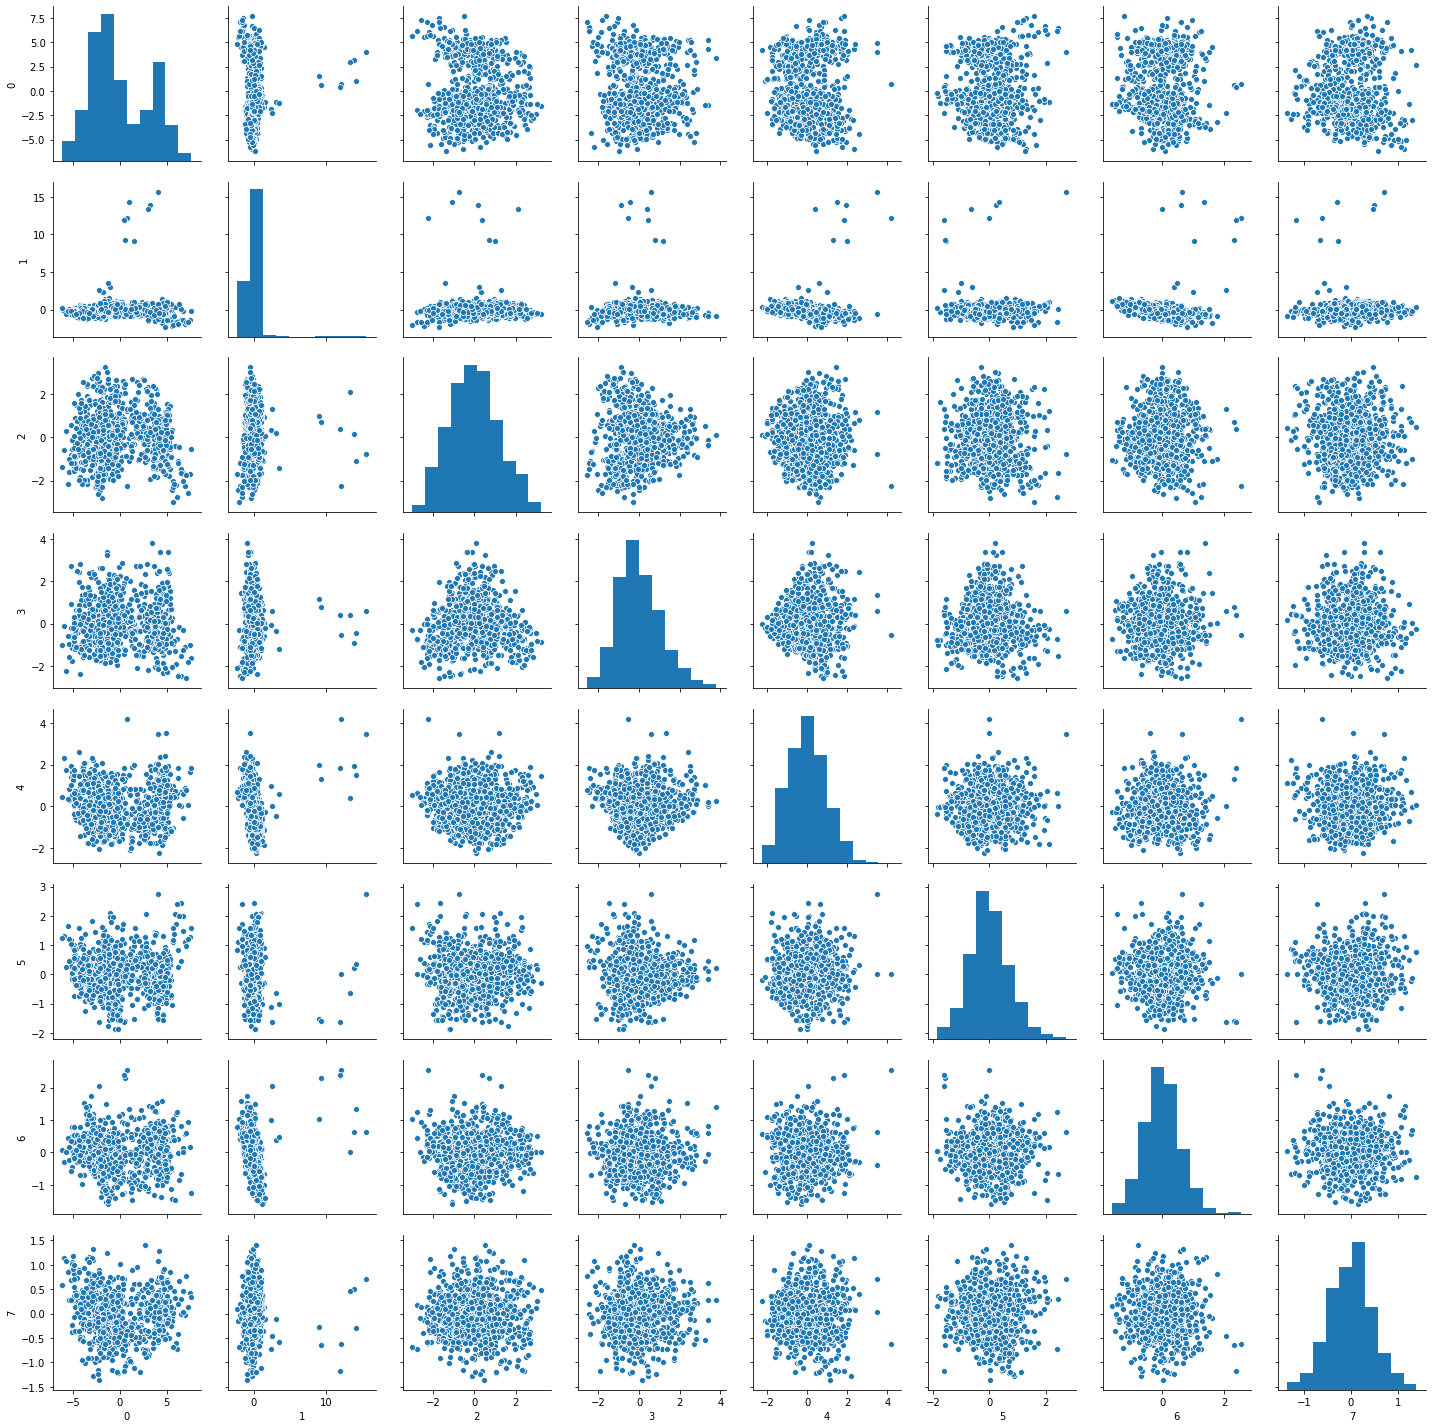

In [ ]:
sns.pairplot(pd.DataFrame(Xpca6))

**SVM before Principle Component Analysis :**

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

model = svm.SVC(kernel = 'linear')

X=np.array(attr_scaled)
y=np.array(df_copy)[:,18]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy_before=accuracy_score(y_test,y_pred,normalize=True)

print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))



Confusion Matrix :
 [[ 66   4   2]
 [  4 122   4]
 [  1   0  51]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        72
         1.0       0.97      0.94      0.95       130
         2.0       0.89      0.98      0.94        52

    accuracy                           0.94       254
   macro avg       0.93      0.95      0.94       254
weighted avg       0.94      0.94      0.94       254



**SVM After Principle  Component analysis :**


In [ ]:
X=np.array(Xpca8)

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy_after=accuracy_score(y_test,y_pred,normalize=True)

print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('\nClassification Report:\n',classification_report(y_test,y_pred))

print ('Accuracy of SVM classifier before PCA: {:}'.format(accuracy_before))


print('Accuracy of SVM classifier after PCA : {:}'.format(accuracy_after))

Confusion Matrix :
 [[ 52   6   1]
 [ 20 105   5]
 [  4   2  59]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.68      0.88      0.77        59
         1.0       0.93      0.81      0.86       130
         2.0       0.91      0.91      0.91        65

    accuracy                           0.85       254
   macro avg       0.84      0.87      0.85       254
weighted avg       0.87      0.85      0.85       254

Accuracy of SVM classifier before PCA: 0.9409448818897638
Accuracy of SVM classifier after PCA : 0.8503937007874016


**Performing GridSearch for Hyperparameter tuning to chick if we are able to achieve an improvement in the prediction score**

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_grid={'C':[0.1,1.0,10.0,100,1000],
                'gamma':[1.0,0.1,0.01,0.001,0.0001],
                'kernel':['linear','rbf']}

gr_sr=GridSearchCV(svm.SVC(),parameter_grid,refit=True,verbose=3)

gr_sr.fit(X_train,y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.859, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.848, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=linear .................................
[CV] ..... C=0.1, gamma=1.0, kernel=linear, score=0.888, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.505, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.505, total=   0.0s
[CV] C=0.1, gamma=1.0, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=1.0, kernel=rbf, score=0.505, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   20.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0, 100, 1000],
                         'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print('Best Parameter set :',gr_sr.best_params_)
print('Best Estimator :',gr_sr.best_estimator_)

Best Parameter set : {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator : SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**Checking the model accuracy with the best parameter set after Grid Search**

In [ ]:
new_model= svm.SVC(C=10.0,gamma=0.1,kernel = 'rbf')

new_model.fit(X_train,y_train)

y_pred=new_model.predict(X_test)
score=accuracy_score(y_test,y_pred,normalize=True)
print(classification_report(y_test,y_pred))
print('Model Accuracy after Grid Search : {:}'.format(score))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        59
         1.0       0.95      0.96      0.96       130
         2.0       0.92      0.94      0.93        65

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254

Model Accuracy after Grid Search : 0.9566929133858267


**After Grid Search the prediction accuracy has improved to approximately 96 %**
